In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MATEJ/cs320/s22/p1_new

Mounted at /content/drive
/content/drive/MyDrive/MATEJ/cs320/s22/p1_new


In [2]:
# project: p1
# submitter: popovski
# partner: none
# hours: 3

In [3]:
# import statements
import copy
import json
import os
import pandas
import numpy as np
import subprocess
import time
import matplotlib.pyplot as plt
import re
from collections import defaultdict

In [4]:
#Q1

type(8/3)

float

In [5]:
#Q2

x = 4
maximum = 15
minimum = 5

error = x <= minimum or x>= maximum # False if x is inside the minimum-to-maximum range
error

True

In [6]:
#Q3

word = "QUOTIDIAN"
suffix_match = True if word[len(word)-3:] == 'IAN' else False # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [7]:
#Q4

def check_sum(x=0 , y=0, sum1 = 0):
    if x + y == sum1:
        return True
    else:
        return False

check_sum(0.1, 0.2, 0.3)

False

In [8]:
#Q5

check_sum(-1, 1)

True

In [9]:
#Q6

x = 4
if x%2 == 1:
    status = "odd"
elif x%2 == 0:
    status = "even"
else:
    status = "non-integer"
status


'even'

In [10]:
#Q7

nums = [3, 4, 1, 6]

def neg_sum(list1):
    sum1 = 0
    for x in list1:
      if x > 0:
        continue
      elif sum1 < -20:
        continue
      else:
        sum1 = sum1 + x
    return sum1

neg_sum(nums)

0

In [11]:
#Q8

neg_sum([-5, 1, -11, -6, 15, -1, 8, 2])

-22

In [12]:
#Q9

header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]

coord3["w"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [13]:
#Q10

rows[0][-1]["x"]

8

In [14]:
#Q11

v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [15]:
#Q12

temp = []
for x in rows:
    #print(x[header.index("B")])
    temp.append(x[header.index("B")])

sum(temp)

412

In [16]:
#Q13

rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [17]:
#Q14

f = open("usd.json")
data = json.load(f)
f.close()

usd = 1000
eqv_cad = data['cad']['rate'] * usd
eqv_cad

1347.0778893177

In [18]:
#Q15

def divide(x, y):
    try:
        return x/y
    except ZeroDivisionError:
        return float('nan')

divide(5, 2)

2.5

In [19]:
#Q16

divide(0, 0)

nan

In [20]:
#Q17

years={}
csv_dir = 'home-computers'
csv_files = os.listdir(csv_dir)

for each in csv_files:
    if each.endswith(".csv"):
        index = each.index('.')
        year = int(each[index - 4 : index])
        df = pandas.read_csv(os.path.join(csv_dir, each), skiprows=1).set_index("Geographic Area Name")
        years[year] = df

sorted(years.keys())

[2017, 2018, 2019, 2020, 2021]

In [21]:
#Q18

df = years[2021]
# print(df.at["Wisconsin", "Estimate!!Total"])
df.loc["Wisconsin"]["Estimate!!Total"]

2401818

In [22]:
#Q19

df = years[2021]
df['Estimate!!Total!!No Computer'].sum()

8902093

In [23]:
#Q20

df = years[2021]
estimate = df['Estimate!!Total!!No Computer']
error = df['Margin of Error!!Total!!No Computer']

s3 = (error / estimate).max()
s3

0.07836701790752577

In [24]:
#Q21

wisco_adj_states = ["Illinois", "Indiana", "Iowa", "Michigan",
                    "Minnesota", "Wisconsin"]
no_comp_percent = {}
df = years[2021]

est_noComp = df['Estimate!!Total!!No Computer']
est_total = df["Estimate!!Total"]

s4 = est_noComp/est_total * 100

for state in wisco_adj_states:
    no_comp_percent[state] = s4[state]

no_comp_percent

{'Illinois': 7.351100500886871,
 'Indiana': 8.300995843439395,
 'Iowa': 8.302263591069158,
 'Michigan': 7.579772219831928,
 'Minnesota': 6.1777398950248985,
 'Wisconsin': 8.029750797104526}

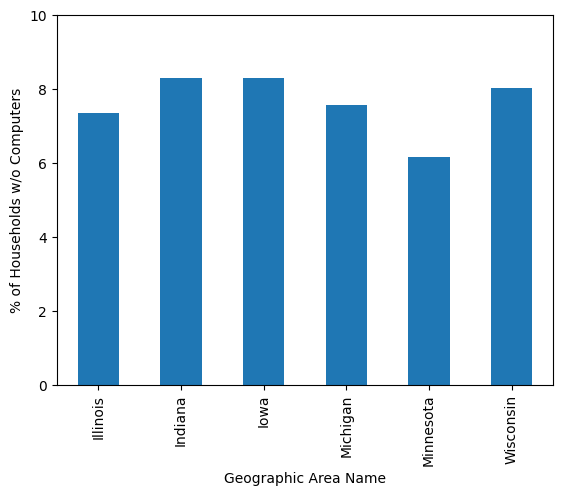

In [25]:
#Q22

s5 = pandas.Series(no_comp_percent)
plot1 = s5.plot.bar(xlabel='Geographic Area Name', ylabel='% of Households w/o Computers')
plot1.set_yticks(np.arange(0,11,2))

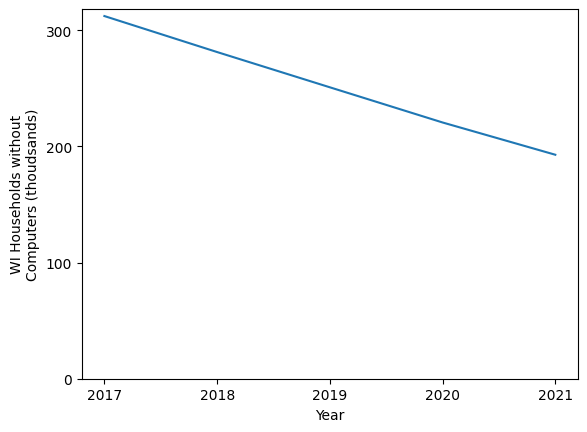

In [26]:
#Q23

wisc_no_computer={}
for year in sorted(years.keys()):
    wisc_no_computer[year] = years[year].loc["Wisconsin"]['Estimate!!Total!!No Computer'] / 1e3
s = pandas.Series(data=wisc_no_computer)
plot2 = s.plot(xlabel = 'Year', ylabel = 'WI Households without\nComputers (thoudsands)', ylim=0)
plot2.set_yticks(np.arange(0,400,100))
plot2.set_xticks(np.arange(2017,2022,1))

<Axes: xlabel='Smartphones (millions)', ylabel='Tablets (millions)'>

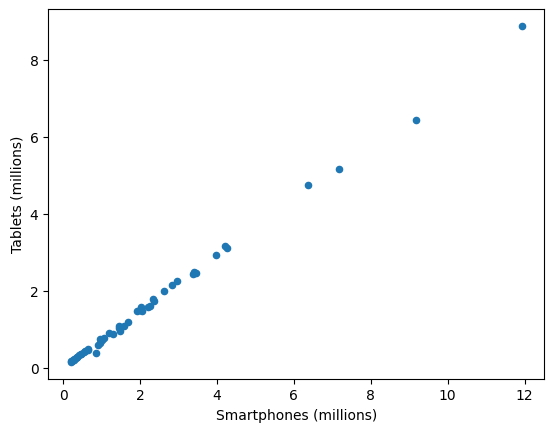

In [27]:
#Q24

df = years[2021]
smartphones = df["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"] / 1e6
tablets = df["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"] / 1e6
s = pandas.DataFrame(data={'Smartphones (millions)': smartphones, 'Tablets (millions)': tablets})
s.plot.scatter(x='Smartphones (millions)', y='Tablets (millions)')

In [28]:
#Q25

if not os.path.exists('flask'):
    subprocess.check_output(['git', 'clone', 'https://github.com/pallets/flask'])

log_output = subprocess.check_output(['git', 'log'], cwd='./flask')
log_output = str(log_output, 'utf-8').split('\n')
len(log_output)
log_output[0]

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [29]:
#Q26

commit_num=[]
for each in log_output:
    if each.startswith('commit'):
        index = len('commit')+1
        commit_num.append(each[index:])

commit_num[-10:]

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [30]:
#Q27

try:
    subprocess.check_output(['git', 'checkout', commit_num[-100:][0]], cwd='./flask')
except subprocess.CalledProcessError as e:
    print("Error checking out the commit:", e)

try:
    with open('./flask/README', 'r') as file:
        readme_contents = file.read()
except Exception as e:
    print("Error reading README file:", e)

log_output_3 = subprocess.call(['git', 'checkout', 'main'], cwd='./flask')
readme_contents

"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [31]:
#Q28

user_counts = defaultdict(int)
merge_pr_pattern = re.compile(r'Merge pull request #[0-9]+ from ([^/]+)/')

for line in log_output:
    match = merge_pr_pattern.search(line)
    if match:
        username = match.group(1)
        user_counts[username] += 1

filtered_users = {user: count for user, count in user_counts.items() if count >= 10}
filtered_users

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [32]:
#Q29

try:
    msg = subprocess.check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output

output_message = msg.decode()

output_message

'ERROR: unknown command "instal" - maybe you meant "install"\n'

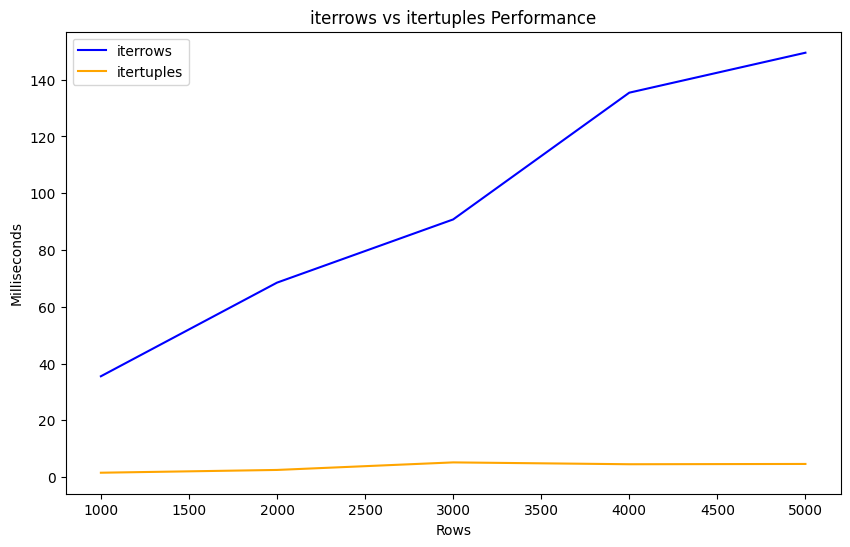

In [33]:
#Q30

def rand_df(rows):
    return pandas.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])

times_df = pandas.DataFrame(dtype=float)
row_sizes = [1000, 2000, 3000, 4000, 5000]

for rows in row_sizes:
    df = rand_df(rows)

    start_time = time.time()
    for row in df.iterrows():
        pass
    iterrows_time = (time.time() - start_time) * 1000

    start_time = time.time()
    for row in df.itertuples():
        pass
    itertuples_time = (time.time() - start_time) * 1000

    times_df.at[rows, "iterrows"] = iterrows_time
    times_df.at[rows, "itertuples"] = itertuples_time

plt.figure(figsize=(10, 6))
plt.plot(times_df.index, times_df['iterrows'], label='iterrows', color='blue')
plt.plot(times_df.index, times_df['itertuples'], label='itertuples', color='orange')
plt.xlabel('Rows')
plt.ylabel('Milliseconds')
plt.title('iterrows vs itertuples Performance')
plt.legend()
plt.show()

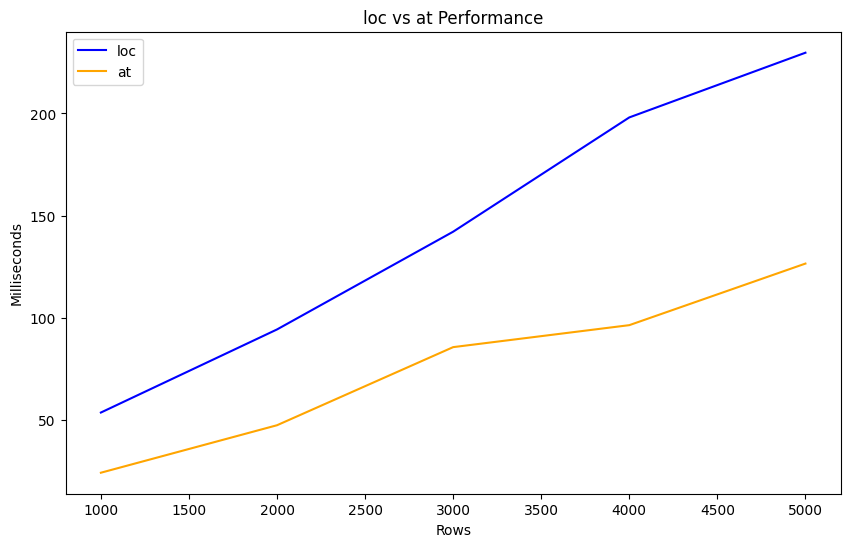

In [34]:
#Q31

times_df = pandas.DataFrame(dtype=float)
row_sizes = [1000, 2000, 3000, 4000, 5000]

for rows in row_sizes:
    df = rand_df(rows)

    start_time = time.time()
    total_loc = 0
    for idx in df.index:
        for col in df.columns:
            total_loc += df.loc[idx, col]
    loc_time = (time.time() - start_time) * 1000

    start_time = time.time()
    total_at = 0
    for idx in df.index:
        for col in df.columns:
            total_at += df.at[idx, col]
    at_time = (time.time() - start_time) * 1000

    times_df.at[rows, "loc"] = loc_time
    times_df.at[rows, "at"] = at_time

plt.figure(figsize=(10, 6))
plt.plot(times_df.index, times_df['loc'], label='loc', color='blue')
plt.plot(times_df.index, times_df['at'], label='at', color='orange')
plt.xlabel('Rows')
plt.ylabel('Milliseconds')
plt.title('loc vs at Performance')
plt.legend()
plt.show()

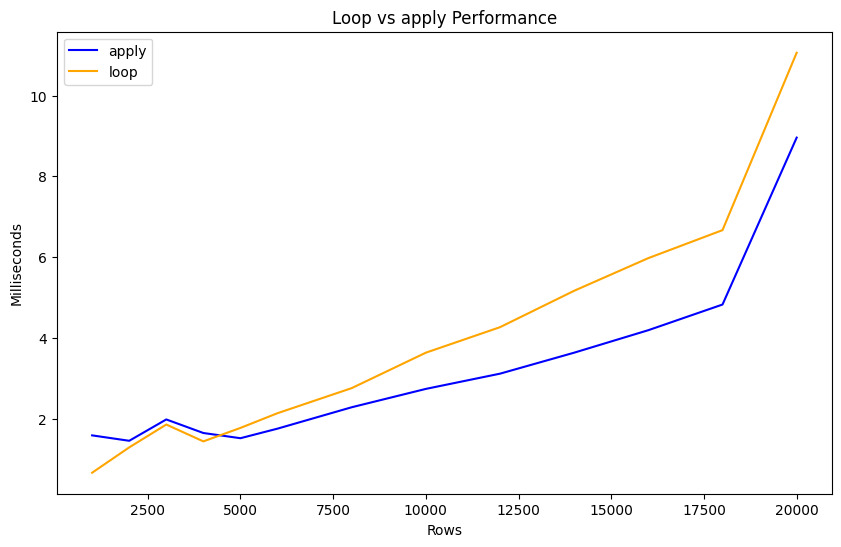

In [35]:
#Q32

def laugh(x):
    return "qwerty" * x

times_df = pandas.DataFrame(dtype=float)

row_sizes.extend([6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000])

for rows in row_sizes:
    df = rand_df(rows)

    start_time = time.time()
    result_apply = df["A"].apply(laugh).tolist()
    apply_time = (time.time() - start_time) * 1000

    start_time = time.time()
    result_loop = []
    for val in df["A"]:
        result_loop.append(laugh(val))
    loop_time = (time.time() - start_time) * 1000

    times_df.at[rows, "apply"] = apply_time
    times_df.at[rows, "loop"] = loop_time

plt.figure(figsize=(10, 6))
plt.plot(times_df.index, times_df['apply'], label='apply', color='blue')
plt.plot(times_df.index, times_df['loop'], label='loop', color='orange')
plt.xlabel('Rows')
plt.ylabel('Milliseconds')
plt.title('Loop vs apply Performance')
plt.legend()
plt.show()